In [ ]:
# Импорт всех необходимых библиотек

In [1]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import re

In [48]:
# Корпус текстов хранится в файле в формате .docx, поэтому прежде всего корпус был переведен в формат txt и загружен в Jupiter.
# Объем корпуса 302 510 слов и 1 956 380 знаков (с пробелами).
# Открываю корпус текстов для работы с ним.
# Текст не вывожу для просмотра, т.к. слишком большой объем.

In [3]:
with open("Краснов.txt", "r", encoding='utf-8') as open_file: 
    text = open_file.read()
# print(text)

In [ ]:
# Токенизирую текст на предложения для отбора только тех предложений, которые содержат искомые слова ("степь" и его производные).
# Результат также не вывожу из-за большого объема.

In [4]:
sentence = sent_tokenize(text)
# print(sentence)

In [49]:
# Создаю список, в который будут добавлены отобранные предложения.
# Отбор предложений осуществляется с помощью регулярных выражений.
# Данное выражение позволяет исключить из выборки слова-производные от "степень" и "Степан", но слово "степей" пришлось прописать отдельно, т.к.начало совпадает со "степенный".
# Выод - список предложений корпуса со словом "степь" или его производными.

In [5]:
target_sent = []
for i in sentence:
    result = re.search(r'[С,с]теп[ьиян].{0,2}|[С,с]тепей', i)
    if not result == None:
        # print(result)
        target_sent.append(i)
target_sent

['Как огнепоклонник, готов часами я сидеть у костра, слушать его и молчаливую, редкую на голоса вечернюю степь, смотреть в розовое, пышущее жаром нутро его.',
 'следить за перебегающими по углам светлыми искрами, и все во мне тогда инстинктивно, противу рассудочности и боязни упроститься, поет славу, гимн Пресветлому Огню, исцелившему моих незапамятно давних предков от мрака, холода и стадного одиночества... Или Пречистой Воде, когда на долгие дни кругом зной, зной, без конца, без облаков и посередине степи, по стрежню моих помыслов, вконец обедневших желаний течет едва ли не пересыхающий ручеек, а я стою на коленях, черпаю шершавым пряным лопушком, и пью, пью до изнеможения и усталости в горле, и с каждым глотком все более становлюсь тем, что я есть — человеком, у которого, кроме жажды, есть и все остальное.',
 'Влажный, пресно пахнущий дождем и пылью ветер налетел неожиданно, откуда-то сбоку, от потемневшей реки; встопорщил соломенную застреху одиноко стоящего в степи сарайчика, а по

In [ ]:
# Для поиска словосочетаний первоначально выбран вариант поиска прилагательных, совпадающих по падежу с существительным.
# 1 Создаю пустой список для полученных словосочетаний
# 2-4 Из списка предложений в цикл передается одно предложение, которое превращается в строку, приводится к нижнему регистру и токенизируется.
# 5-6 Каждый токен подвергается морфологическому анализу.
# 7-8 Вариант выбора наиболее вероятного разбора привел к тому, что в выборку не попадали словосочетания, в которых слово "степь" стоит в именительном падеже.
# В связи с этим было решено проходить циклом по всем вариантам разбора.
# 9-11 Определяется начальная форма слова, если это "степь", то в переменные сохраняются падеж и индекс токена.
# 12-14 Для прилагательного решено оставить первый вариант, т.к. иначе количество неверных словосочетаний увеличивалось.
# Если токен является прилагательным и его падеж совпадает с падежом существительного, то в переменную сохраняется индекс токена.
# 15 Определяется разница между индексами двух токенов (я взяла 4, т.к. в тексте есть прилагательныые, отделенные от существительного другими словами).
# Если взять разницу индексов 1, то будет определяться прилагаетельное, непосредственно стоящее перед существительным.
# Также условием является то, чтобы прилагательное стояло до существительного (ind > ind_adj).
# 16 Токены соединяются в словосочетание.
# Словосочетание добавляется в список.
# Процент ошибочно выбранных словосочетаний с придагательными почти 50.

In [104]:
colloc = []
for sentence in target_sent:
    sent = str(sentence)
    norm_sent = sent.lower()
    token_sent = word_tokenize(norm_sent)
    for word in token_sent:
        parse = morph.parse(word)
        for i in range(len(parse)):
            if parse[i].normal_form == 'степь':
                p = parse[i].tag.case
                ind = token_sent.index(word)
                for adj in token_sent:
                    if morph.parse(adj)[0].tag.POS == 'ADJF' and morph.parse(adj)[0].tag.case == p:
                        ind_adj = token_sent.index(adj)
                        if abs(ind - ind_adj) <= 4 and ind > ind_adj:
                            phrase = adj + ' ' + word 
                            colloc.append(phrase)
colloc                    

['редкую степь',
 'вечернюю степь',
 'стоящего степи',
 'покорную степь',
 'заметные степь',
 'один степи',
 'разных степи',
 'низовой степи',
 'жесткую степи',
 'голом степи',
 'печальном степи',
 'нашу степь',
 'открытой степи',
 'всей степи',
 'каких степи',
 'открытой степи',
 'давний степи',
 'зимней степи',
 'ровной степью',
 'ясный степи',
 'скушный степи',
 'скушной степи',
 'какую степи',
 'голая степь',
 'видную степь',
 'ближних степей',
 'полденных степей']

In [ ]:
# Список вручную очищен от ошибочных словосочетаний

In [83]:
del (colloc)[11]
colloc

['редкую степь',
 'вечернюю степь',
 'покорную степь',
 'низовой степи',
 'нашу степь',
 'открытой степи',
 'всей степи',
 'открытой степи',
 'зимней степи',
 'ровной степью',
 'скушной степи',
 'голая степь',
 'видную степь',
 'ближних степей',
 'полденных степей']

In [99]:
# Визуализация словосочетаний (как дополнительное средство анализа)

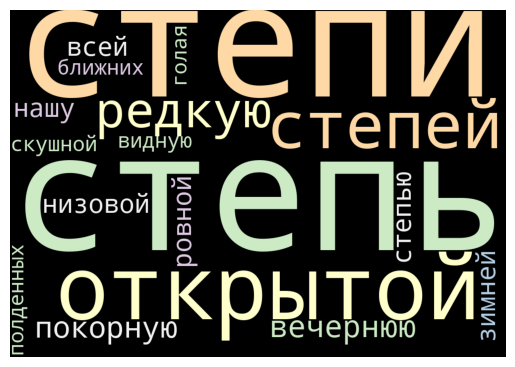

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, 
                      height = 700,
                      background_color='black', 
                      colormap='Pastel1').generate(', '.join(colloc))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Вариант определения тематического поля через срез ближайшего окружения слова.
# Копирую выбранные предложения с искомым словом.

In [6]:
target_sent2 = target_sent
target_sent2

['Как огнепоклонник, готов часами я сидеть у костра, слушать его и молчаливую, редкую на голоса вечернюю степь, смотреть в розовое, пышущее жаром нутро его.',
 'следить за перебегающими по углам светлыми искрами, и все во мне тогда инстинктивно, противу рассудочности и боязни упроститься, поет славу, гимн Пресветлому Огню, исцелившему моих незапамятно давних предков от мрака, холода и стадного одиночества... Или Пречистой Воде, когда на долгие дни кругом зной, зной, без конца, без облаков и посередине степи, по стрежню моих помыслов, вконец обедневших желаний течет едва ли не пересыхающий ручеек, а я стою на коленях, черпаю шершавым пряным лопушком, и пью, пью до изнеможения и усталости в горле, и с каждым глотком все более становлюсь тем, что я есть — человеком, у которого, кроме жажды, есть и все остальное.',
 'Влажный, пресно пахнущий дождем и пылью ветер налетел неожиданно, откуда-то сбоку, от потемневшей реки; встопорщил соломенную застреху одиноко стоящего в степи сарайчика, а по

In [ ]:
# 1 Создаю список для хранения очищенных предложений
# 3-4 Приведение к нижнему регистру и токенизация
# 5-6 Очищение от знаков пунктуации и стоп-слов
# 7 Добавление в список

In [7]:
clean_sent = []
for sentence in target_sent2:
        low_sent2 = sentence.lower()
        token_sent2 = word_tokenize(low_sent2)
        punkt_sent2 = [word for word in token_sent2 if word[0].isalpha()]
        stop_sent2 = [word for word in punkt_sent2 if word not in stop_words]
        clean_sent.append(stop_sent2)
clean_sent

[['огнепоклонник',
  'готов',
  'часами',
  'сидеть',
  'костра',
  'слушать',
  'молчаливую',
  'редкую',
  'голоса',
  'вечернюю',
  'степь',
  'смотреть',
  'розовое',
  'пышущее',
  'жаром',
  'нутро'],
 ['следить',
  'перебегающими',
  'углам',
  'светлыми',
  'искрами',
  'инстинктивно',
  'противу',
  'рассудочности',
  'боязни',
  'упроститься',
  'поет',
  'славу',
  'гимн',
  'пресветлому',
  'огню',
  'исцелившему',
  'моих',
  'незапамятно',
  'давних',
  'предков',
  'мрака',
  'холода',
  'стадного',
  'одиночества',
  'пречистой',
  'воде',
  'долгие',
  'дни',
  'кругом',
  'зной',
  'зной',
  'конца',
  'облаков',
  'посередине',
  'степи',
  'стрежню',
  'моих',
  'помыслов',
  'вконец',
  'обедневших',
  'желаний',
  'течет',
  'едва',
  'пересыхающий',
  'ручеек',
  'стою',
  'коленях',
  'черпаю',
  'шершавым',
  'пряным',
  'лопушком',
  'пью',
  'пью',
  'изнеможения',
  'усталости',
  'горле',
  'каждым',
  'глотком',
  'становлюсь',
  'человеком',
  'которого',

In [9]:
# 1 Создаю список для срезов
# 3-4 Поиск слова "степь" или его производных в каждом элементе списка clean_sent.
# 5-8 Когда слово найдено, в переменную передается его индекс и на его основе задаются две другие переменные, обозначающие границы среза.
# Границы среза можно расширять или сужать. Нами выбран размер среза в пять слов, что примерно соответствует типичной удаленности существительного от определения.
# Добавление среза в список.
# Пустые элементы, как я понимаю, появляются потому, что начальная граница среза оказывается за границей предложения, т.е.от начала предложения слов меньше, чем требуется.

In [15]:
field = []
for sentence in clean_sent:
    for word in sentence:
        result = re.search(r'(степ)', word)
        if not result == None:
            a = int(sentence.index(word))
            field.append(sentence[a-2:a+3])
for i in field:
    print(i)

['голоса', 'вечернюю', 'степь', 'смотреть', 'розовое']
['облаков', 'посередине', 'степи', 'стрежню', 'моих']
['одиноко', 'стоящего', 'степи', 'сарайчика', 'свалился']
['ковылем', 'скудным', 'степным', 'разнотравьем', 'конопляником']
['придавленную', 'тучами', 'степь']
['онемевшими', 'перелесками', 'степью', 'рослыми', 'июльскими']
[]
['целое', 'лето', 'степь', 'уходить', 'стало']
['начиналось', 'берегу', 'степной', 'речушки', 'неширокой']
['заметные', 'балки', 'степь']
['солнцем', 'короткими', 'степными', 'ливнями', 'вроде']
['птиц', 'запах', 'степи', 'тонкий', 'острый']
['радость', 'теплого', 'степного', 'дня', 'отягощенного']
['синь', 'пролил', 'степь', 'первую', 'трель']
['прибитой', 'росой', 'степной', 'пыли', 'сыромятного']
['заплыло', 'травой', 'степным', 'ягодником', 'скатам']
['разных', 'концах', 'степи', 'переливали', 'свои']
['траву', 'низовой', 'степи', 'глядя', 'собой']
['травы', 'маленькие', 'степные', 'муравьи', 'волокли']
['стало', 'голосов', 'степи…', 'разморило', 'коль